# Predictive Maintenance using Linear Regression for Remaining Useful Life (RUL) Prediction

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('maintenance_dataset.csv')
data.head()

,vibration_mm_s,temperature_C,runtime_hours,load,RUL_hours
0,2.848,70.56,1423.1,0.720,1889.99
1,2.403,76.46,926.1,0.195,2854.47
2,2.953,56.61,5127.8,0.278,248.61
3,3.566,68.38,5681.2,0.242,1.00
4,2.336,61.10,349.5,0.891,2615.83


In [25]:
# checking null values
data.isnull().sum()

vibration_mm_s    0
temperature_C     0
runtime_hours     0
load              0
RUL_hours         0
dtype: int64

In [26]:
# Checking correlation between variables
data.corr()

,vibration_mm_s,temperature_C,runtime_hours,load,RUL_hours
vibration_mm_s,1.000000,-0.075681,0.026328,-0.055679,-0.196785
temperature_C,-0.075681,1.000000,0.023780,0.025523,-0.102711
runtime_hours,0.026328,0.023780,1.000000,0.171265,-0.897087
load,-0.055679,0.025523,0.171265,1.000000,-0.260637
RUL_hours,-0.196785,-0.102711,-0.897087,-0.260637,1.000000


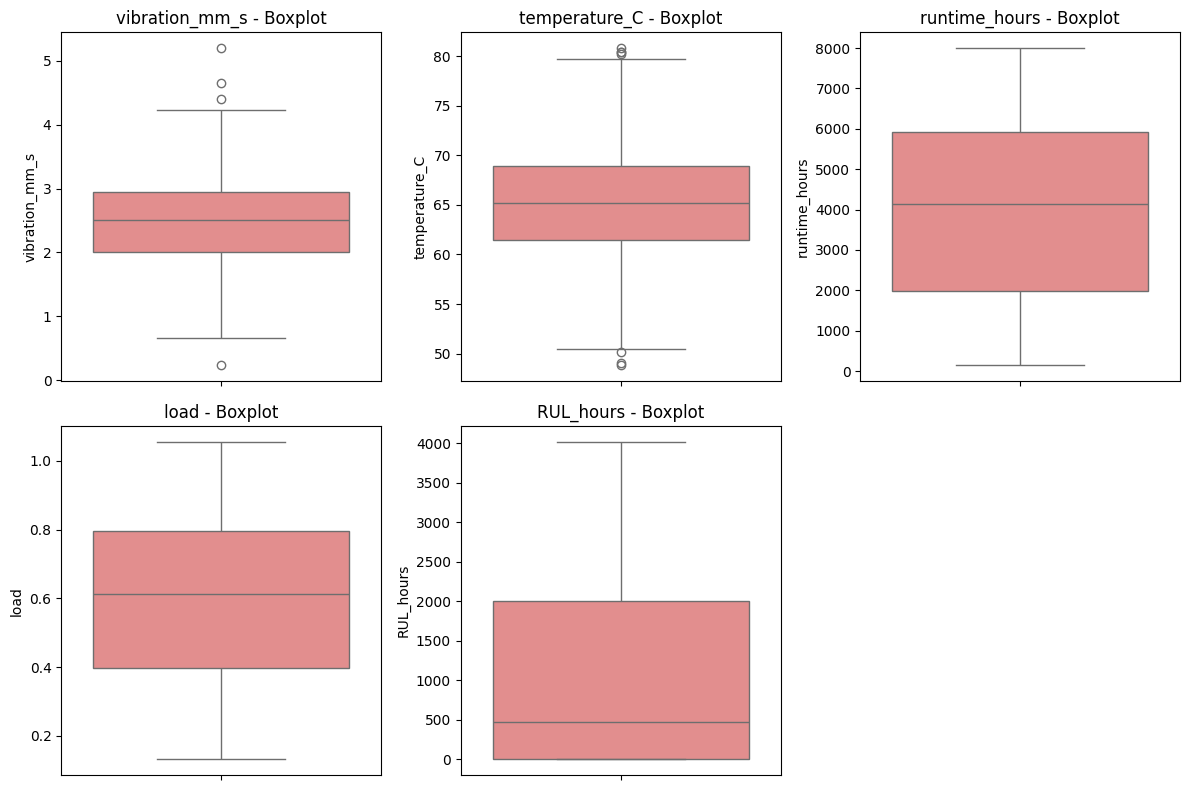

In [27]:
## OutLier Detection
plt.figure(figsize=(12,8))
for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f"{col} - Boxplot")
plt.tight_layout()
plt.show()

### 1. vibration_mm_s :- 
The data is centered between 2–3 mm/s, which is typical for normal machine operation.
A few outliers on both low and high ends represent sensors capturing moments of low or excessive vibration.
### 2. temperature_C :- 
Mostly clustered between 60°C and 70°C, with some readings above 75°C and below 50°C.
### 3. runtime_hours :- 
Spread widely from 0 to 8000 hours with no major outliers.
### 4. load :-
Ranges from 0.1 to 1.0, nicely distributed.
### 5. RUL_hours :- 
Distribution shows a wide range (0–4000 hours). The lower whisker near 0 represents machines close to failure.

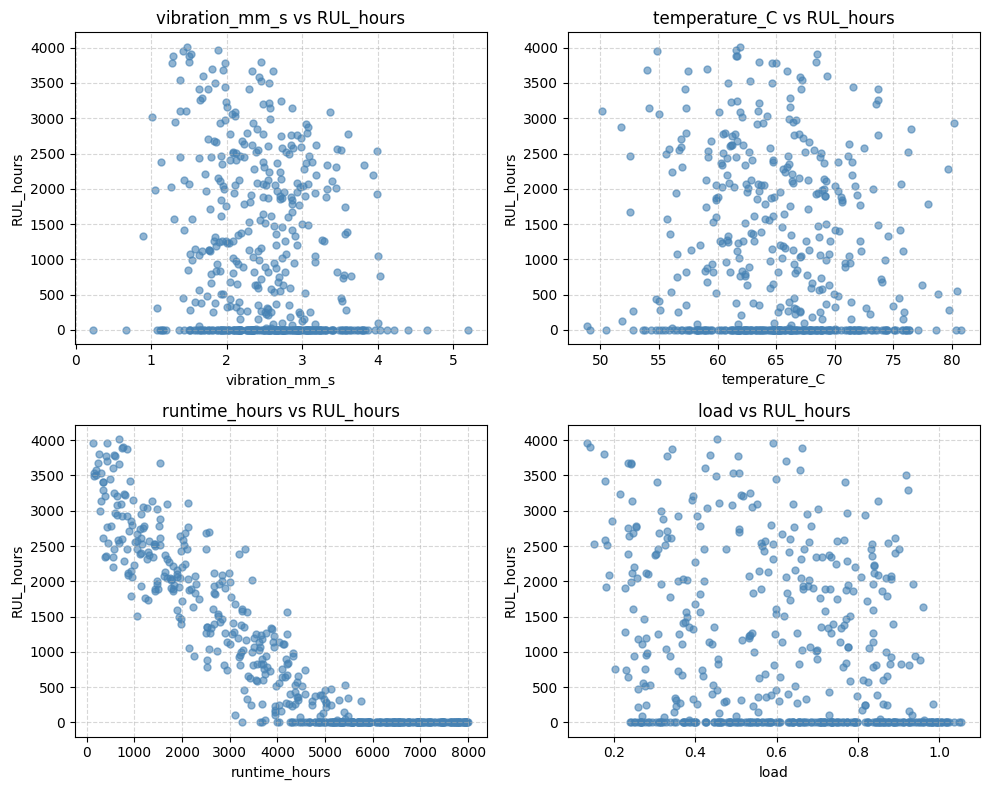

In [28]:
features = ['vibration_mm_s', 'temperature_C', 'runtime_hours', 'load']

plt.figure(figsize=(10, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(data[col], data['RUL_hours'], color='steelblue', alpha=0.6, s=25)
    plt.title(f'{col} vs RUL_hours')
    plt.xlabel(col)
    plt.ylabel('RUL_hours')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 1. Runtime_hours vs RUL_hours :- 
You can clearly see a strong negative relationship — as runtime increases, RUL (Remaining Useful Life) decreases.
### 2. Vibration, Temperature, and Load vs RUL_hours :- 
They show weak-to-moderate negative trends. These factors still influence RUL indirectly; high vibration, high temperature, and heavy load generally shorten life but with variability.
## With this is exactly what we expect and confirms that runtime_hours is the dominant predictor.

In [29]:
from sklearn.model_selection import train_test_split

# Defining Features(Independent) and Target(Dependent) Variables
X = data[['vibration_mm_s','temperature_C','runtime_hours','load']]
Y = data['RUL_hours']

In [30]:
# Split data 80%-20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [31]:
x_train.shape

(400, 4)

In [32]:
x_test.shape

(100, 4)

In [33]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [35]:
## Applying Linear Regression and Creating model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = regression.predict(x_test)
y_pred

array([1751.02043406, 1701.81618586, 1021.20554219,  949.45462754,
       2382.99927483, 2125.62467369, -315.30309792, 1464.27276988,
         48.00962812, 3244.03402043, -512.21267052, 1912.04358217,
       2238.95500948, 2488.34634775, -407.23199853, 2209.95448394,
        211.61470592, 2660.87180158,  977.53842536, 1146.40901411,
        327.71734298,  616.77698426, 3062.93212021, 2006.80372338,
       -305.29693834, 1074.28642443,  391.33910757,  606.44710296,
       2425.30825502,   82.656278  ,  286.15124734,  486.47689445,
       1140.33901849,  217.44227687,  786.31293056, 1560.51484366,
       2135.4325812 ,  429.19031389,  392.28667341,  928.44764923,
       1918.55932896, 1086.75745484,   33.49788069, 2221.72536909,
       1564.40092902,  969.37247298, 2110.43097916,  208.14256556,
       2805.66779688, 2724.3960196 , 2529.47516783,   45.81980685,
       -781.89714722,  552.83804291, 1414.92407568,  482.81455467,
       -556.57642259, 1702.85164114, 1599.02983076, 2091.08551

In [37]:
# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.817
MAE: 373.872
MSE: 196364.919
RMSE: 443.131


## Assumptions :-

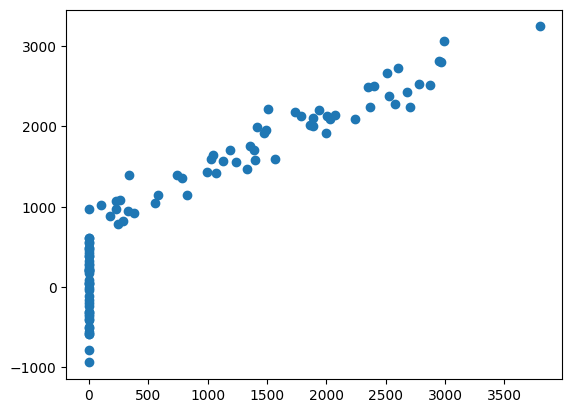

In [38]:
plt.scatter(y_test,y_pred)

### 1. The points form a clear upward trend, meaning the model captures the general relationship between actual and predicted RUL — good linear behavior
### 2. Many points align close to the diagonal, indicating strong predictive consistency.
### 3. Some spread at lower RUL values (bottom left region) — this suggests that:
### 4. When the machine is near failure (low RUL), the model slightly struggles to precisely estimate the small remaining hours.
### 5. This is normal in predictive maintenance because failure signals (e.g., vibration, temperature) fluctuate sharply near breakdowns.

In [39]:
residuals = y_test - y_pred

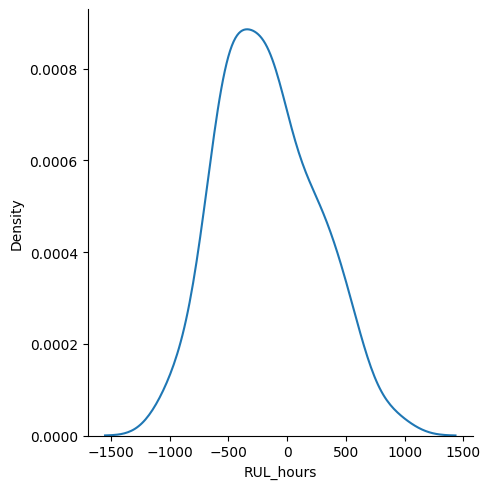

In [40]:
## Plotting this residuals
sns.displot(residuals, kind='kde')

# Conclusion :- 
### The Linear Regression model built on the real-world predictive maintenance dataset demonstrated strong performance, achieving an R² score of approximately 0.81, which indicates that about 81% of the variance in the Remaining Useful Life (RUL) can be explained by the features — vibration, temperature, runtime, and load.
### The model’s MAE (~ 374 hours) and RMSE (~ 443 hours) show that the average prediction error is within a reasonable range, making it suitable for real-world maintenance forecasting. Overall, the model provides accurate, interpretable, and data-driven insights that can help anticipate machine failures in advance and enable proactive maintenance scheduling to reduce downtime and costs.